Implement a Linear Regression model to predict the prices of houses based on their square footage and number of bedrooms and bathrooms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train_df.shape

(1460, 81)

In [5]:
test_df.shape

(1459, 80)

In [6]:
# List of columns to be dropped from the DataFrame
drop_cols = ['FireplaceQu', 'Street', 'LandContour', 'LotShape', 'Alley', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
             'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','MasVnrType', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
             'PoolQC', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'Electrical', 'CentralAir', 'KitchenQual',
             'Functional', 'MSZoning', 'MiscFeature', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'BsmtQual', 'Fence', 'GarageType','SaleType', 'SaleCondition']

# Dropping the specified columns from the train_df and test_df DataFrames
train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

In [7]:
train_df.shape

(1460, 38)

In [8]:
test_df.shape

(1459, 37)

In [9]:
# Checking for missing values in train_df DataFrame
train_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
# Filling missing values in 'LotFrontage', 'MasVnrArea', and 'GarageYrBlt' columns with their respective means
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [12]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [13]:
test_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
test_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
test_df['BsmtFinSF1'] = train_df['BsmtFinSF1'].fillna(train_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = train_df['BsmtFinSF2'].fillna(train_df['BsmtFinSF2'].mean())
test_df['TotalBsmtSF'] = train_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].mean())
test_df['BsmtUnfSF'] = train_df['BsmtUnfSF'].fillna(train_df['BsmtUnfSF'].mean())
test_df['BsmtHalfBath'] = train_df['BsmtHalfBath'].fillna(train_df['BsmtHalfBath'].mean())
test_df['BsmtFullBath'] = train_df['BsmtFullBath'].fillna(train_df['BsmtFullBath'].mean())
test_df['GarageArea'] = train_df['GarageArea'].fillna(train_df['GarageArea'].mean())
test_df['GarageCars'] = train_df['GarageCars'].fillna(train_df['GarageCars'].mean())
test_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

In [14]:
# Separating features (X) and target variable (y) in the train_df DataFrame
x = train_df.drop(columns='SalePrice')
y = train_df[['SalePrice']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
ml = LinearRegression()

# Fitting the model on the training data
ml.fit(X_train,y_train)

LinearRegression()

In [17]:
# Predicting SalePrice using the trained model on training data
y_pred=ml.predict(X_train)

In [18]:
from sklearn.metrics import mean_squared_error

# Calculating the Root Mean Squared Error (RMSE) on training data
mean_squared_error(y_train, y_pred, squared=False)

33322.46401563825

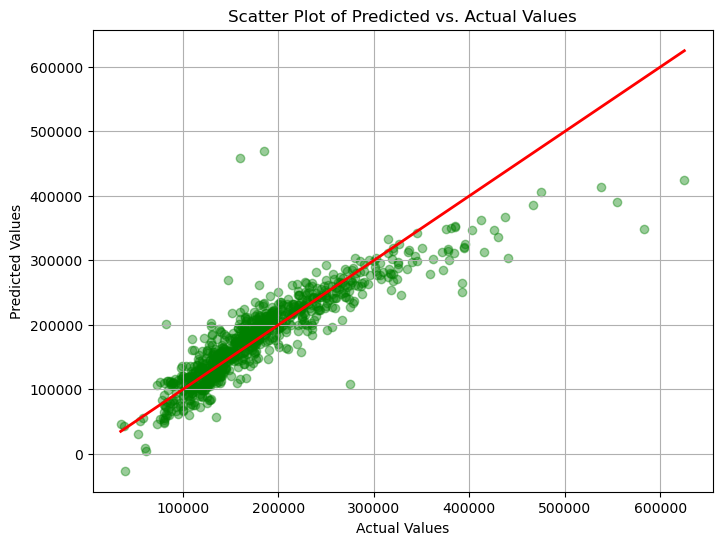

In [21]:
# Plotting the scatter plot of predicted vs. actual SalePrice on training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, color='green', alpha=0.4)  # Scatter plot of actual vs. predicted SalePrice
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='-', linewidth=2) # Diagonal line representing perfect prediction
plt.xlabel('Actual Values') #label for x-axis
plt.ylabel('Predicted Values') #label for y-axis
plt.title('Scatter Plot of Predicted vs. Actual Values') #Title of the plot
plt.grid(True) #displaying grid in the plot
plt.show() #Showing the plot